# Аналитика данных с помощью `pandas` и `matplotlib`

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.
 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация matplotlib](https://matplotlib.org/index.html)

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если набран как минимум 1 балл.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект:
- заполняете данный ноутбук
- создаете приватный репозиторий в GitHub
- добавляете в него проверяющего
- загружаете заполненный ноутбук в отдельную ветку
- создаете MR с указанием проверяющего

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

## 1. Данные (2 балла)

Скачиваем данные для работы:

In [ ]:
%%bash
gdown 1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM

Downloading...
From: https://drive.google.com/uc?id=1l-vkTaM1sK0g2jWHkwiFWDtWjCrac9uM
To: /content/coins.csv
100%|██████████| 3.98M/3.98M [00:00<00:00, 121MB/s]


Начнем с необходимых приготовлений.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла `coins.csv`. Создайте объект типа `pandas.DataFrame` с именем `coins` и в качестве индекса выберите колонку с датой.

In [ ]:
# Paste your code here
coins = pd.read_csv('coins.csv', index_col=['date'])

Посмотрим что получилось

In [ ]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):

### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [ ]:
# Paste your code here
print(len(coins['name'].value_counts()))

70


### 2. За какой период данные мы имеем? (0.4 балла)

In [ ]:
# Paste your code here
print(coins.index.min(), coins.index.max())

2013-04-28 2018-06-06


### 3. Есть ли пропуски в данных? Какой природы эти пропуски, чем они скорее всего вызваны? (0.5 балла)

In [ ]:
# Paste your code here
coins.isnull().sum()

price               327
txCount            1520
txVolume           1830
activeAddresses    1520
symbol                0
name                  0
open                  0
high                  0
low                   0
close                 0
volume                0
market                0
dtype: int64

### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [ ]:
# Paste your code here
coins.loc[(coins['price'] == coins['price'].max()), ['name', 'price']]

,name,price
date,,
2017-12-17,Bitcoin,19475.8


### 5. У какой монеты самая высокая и самая низкая средняя капитализация (среднее арифметическое капитализаций за все доступные дни)? Постройте круговую диаграмму с долями. (0.5 балла)

Max: Bitcoin; min: KingN Coin


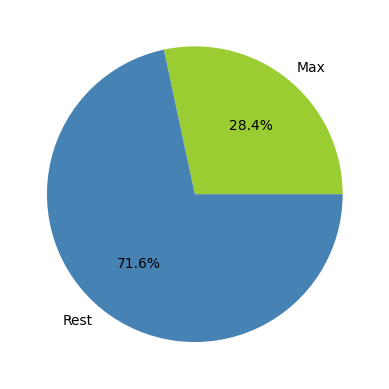

In [ ]:
# Paste your code here
colors=['yellowgreen', 'steelblue']

grouped_coins = coins.groupby('name')
avg_cap = grouped_coins['market'].mean().sort_values(ascending=False)
print(f'Max: {avg_cap.idxmax()}; min: {avg_cap.idxmin()}')

plt.pie(
    [avg_cap[0], avg_cap.sum() - avg_cap[0]],
    labels=['Max', 'Rest'], colors=colors, autopct='%1.1f%%'
)
plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

**Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.**

На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать `candlestick_ohlc` (`from mplfinance.original_flavor import candlestick_ohlc`), но можно и без него.

In [ ]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    # Paste your code here

    fig = plt.figure(figsize=(10, 3))
    ax = fig.add_subplot(111)
    fig.set_size_inches(20, 11)
    ax.set_xlabel('Date', size=20)
    ax.set_ylabel('Price', size=20)

    table = coins[(coins.symbol == symbol) & (start_date <= coins.index) & (end_date >= coins.index)]
    table = table.loc[start_date:end_date]


    ax.plot(table.index, table.open, color='seagreen', label='Open')
    ax.plot(table.index, table.close, color='indigo', label='Close')
    ax.plot(table.index, table.high, color='crimson', label='High')
    ax.plot(table.index, table.low, color='darkorange', label='Low')

    ax.set_xticks(table.index.values[::table.shape[0] // 15])

    plt.title(f'{symbol} price changes from {start_date} to {end_date}')
    plt.legend(loc='upper right', borderaxespad=1)
    plt.grid(True)
    plt.show()


Посмотрим, что получилось:

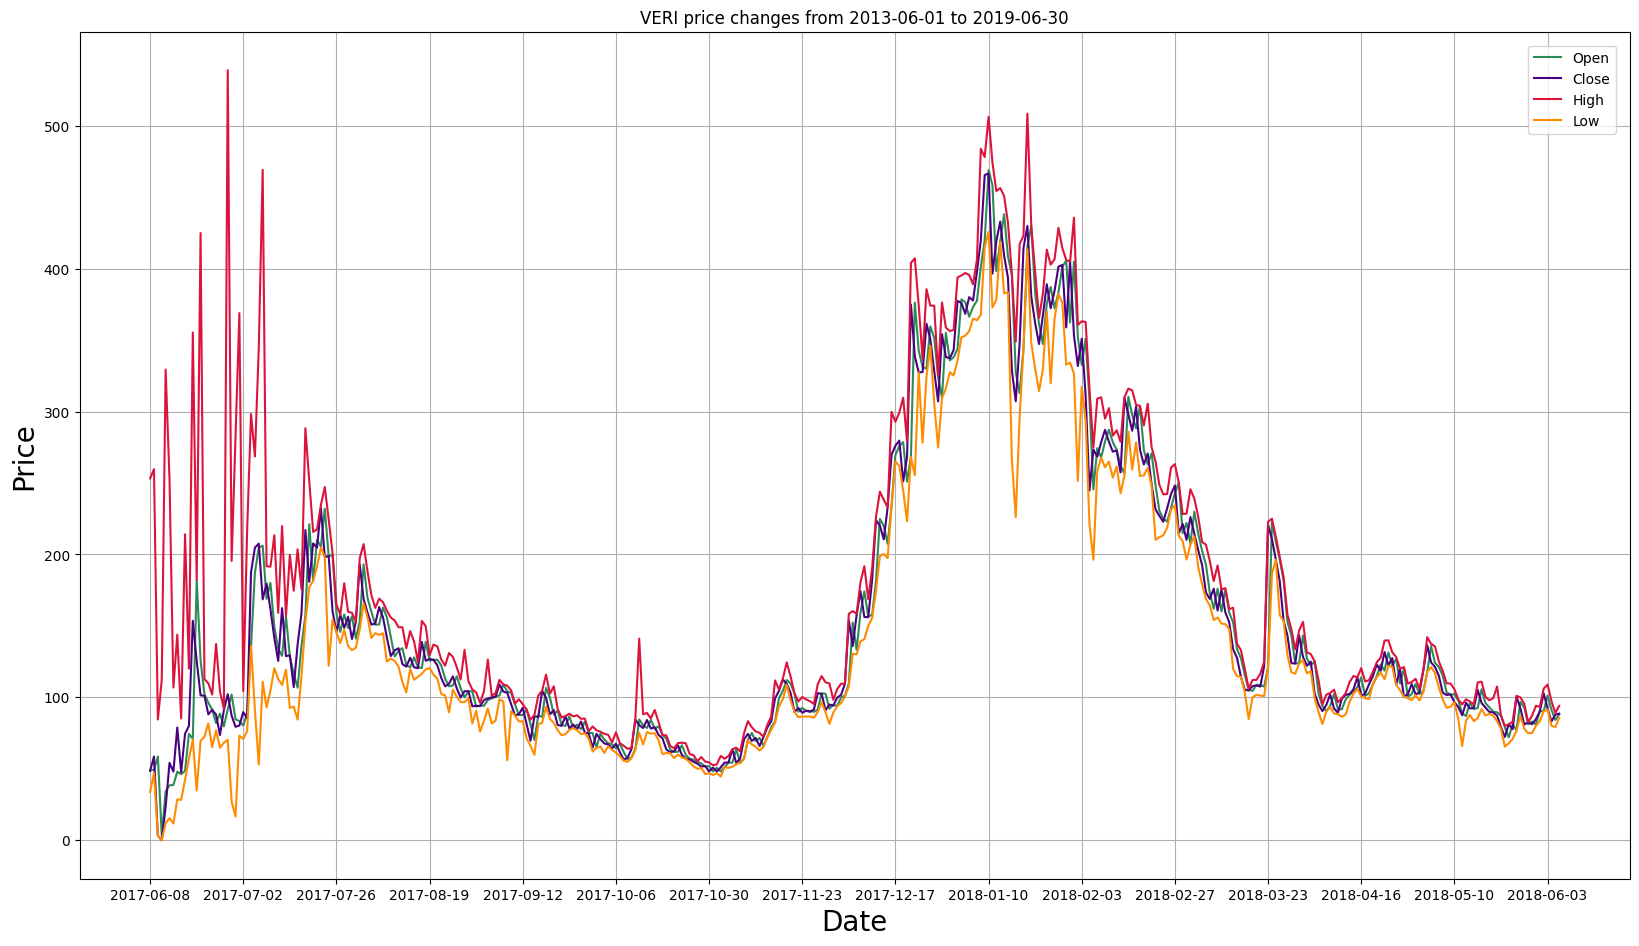

In [ ]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30')

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)

Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - **pump'n'dump** (накачка и сброс).

Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

Ваша задача -- **найти самый сильный pump'n'dump** монеты на заданном промежутке времени. Для этого для каждого дня определим число `pnd` равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день, когда `pnd` был максимален и величину `pnd`.

In [ ]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    # Paste your code here
    info = coins[coins.symbol == symbol].loc[start_date:end_date]
    pnd = info.high / info[['open', 'close']].max(axis=1)
    return pnd.idxmax(), pnd.max()

In [ ]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

('2017-11-29', 1.1428940004366206)

[Текст ссылки](https://)Сравните эти значения для разных монет:

In [ ]:
for coin_name in set(coins.symbol):
    print(coin_name, find_most_severe_pump_and_dump(coins, coin_name, '2017-06-01', '2018-06-01'))

LSK ('2017-06-07', 1.4424778761061947)
ENG ('2017-12-25', 1.3618677042801557)
ELF ('2018-01-05', 1.2808988764044942)
ZEC ('2017-09-28', 1.3298776561493881)
ETC ('2017-12-19', 1.1482493171095107)
MANA ('2017-09-21', 2.9702777900454884)
RHOC ('2017-10-08', 5.075208458226606)
ICX ('2017-12-16', 1.2538461538461536)
KNC ('2017-09-19', 1.8519240136385777)
DRGN ('2018-01-02', 1.211764705882353)
DCR ('2018-04-25', 1.8054444587795122)
AE ('2017-08-06', 1.7482936279178192)
DGB ('2017-12-17', 1.359942799461642)
NAS ('2017-11-17', 1.1758241758241759)
USDT ('2017-11-12', 1.099009900990099)
AION ('2017-11-24', 1.3624161073825503)
PAY ('2017-07-06', 1.3514021619927934)
DOGE ('2017-12-17', 1.2747326203208558)
ZRX ('2018-04-05', 1.254990051045648)
POLY ('2018-02-02', 1.4553773349994372)
EOS ('2017-07-03', 1.3202933985330074)
ETHOS ('2017-08-05', 1.3698404867620457)
MTL ('2017-11-20', 1.6728538283062646)
FUN ('2017-06-29', 12.490562327959102)
VEN ('2017-12-27', 1.2713567839195978)
GAS ('2017-09-14', 1.4

## 4. Окупаемость инвестиций (1 балл)

Вам нужно посчитать **окупаемость инвестиций (ROI)** в криптовалюты на заданном промежутке времени.

Окупаемость определяется как отношение *изменения цены портфеля* к *исходной цене портфеля*. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.

`investments` - словарь, в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD).

In [ ]:
def compute_roi(coins, investments, start_date, end_date):
    # Paste your code here
    start_money = 0
    delta_money = 0
    for symbol, cost in investments.items():
        start_money += cost
        start_price = coins['price'][ (coins['date'] == start_date) & (coins['symbol']  == symbol)].iloc[0]
        end_price = coins['price'][ (coins['date'] == end_date) & (coins['symbol']  == symbol)].iloc[0]
        delta_money += (cost / start_price) * end_price
    return delta_money / start_money

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

BTC
              price   txCount      txVolume  activeAddresses symbol     name  \
date                                                                           
2018-06-01  7500.70  205315.0  6.206627e+09         692509.0    BTC  Bitcoin   
2018-06-02  7536.72  174345.0  4.151723e+09         521910.0    BTC  Bitcoin   
2018-06-03  7632.09  163280.0  4.477652e+09         531463.0    BTC  Bitcoin   
2018-06-04  7722.53  209733.0  7.925997e+09         702904.0    BTC  Bitcoin   
2018-06-05  7500.90  212726.0  5.821974e+09         655694.0    BTC  Bitcoin   
2018-06-06  7625.97  206270.0  5.055067e+09         651145.0    BTC  Bitcoin   

               open     high      low    close        volume        market  
date                                                                        
2018-06-01  7500.70  7604.73  7407.34  7541.45  4.921460e+09  1.280140e+11  
2018-06-02  7536.72  7695.83  7497.26  7643.45  4.939300e+09  1.286450e+11  
2018-06-03  7632.09  7754.89  7613.04  7720.25 

In [ ]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

## 5. Технический анализ (1 балл)

**Технический анализ** - это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - **[границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands)**. Кто-то верит, что график касаясь границы от него должен отражаться.

Границы считаются очень просто:

$$(MA \pm K\sigma),$$

где `MA` - скользящее среднее за `N` дней, а $\sigma$ - скользящее стандартное отклонение за `N` дней.

Нарисуйте **график цены**, **скользящее среднее** и **границы Боллинджера** c параметрами `N (window) = 21`, `K (width) = 2`.

Тут вам поможет функция `rolling` для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [ ]:
def plot_bollinger_bands(coins, symbol, window, width):
    # Paste your code here
    table = coins[coins.symbol == symbol]
    table.dropna()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    d = table.index
    price = table.price
    roller = table.close.rolling(window)
    mean = roller.mean()
    std = roller.std()
    upper_bounds = mean + std * width
    lower_bounds = mean - std * width
    ax.plot(d, price)
    ax.plot(d, mean)
    ax.plot(d, upper_bounds)
    ax.plot(d, lower_bounds)

    fig.set_size_inches(20, 10)
    ax.set_xlabel('date', size=20)
    ax.set_ylabel('cost', size=20)
    plt.title('fancy price graph', fontsize=20)
    ax.set_xticks(price.index.values[::price.shape[0] // 15])
    plt.grid(True)
    plt.show()

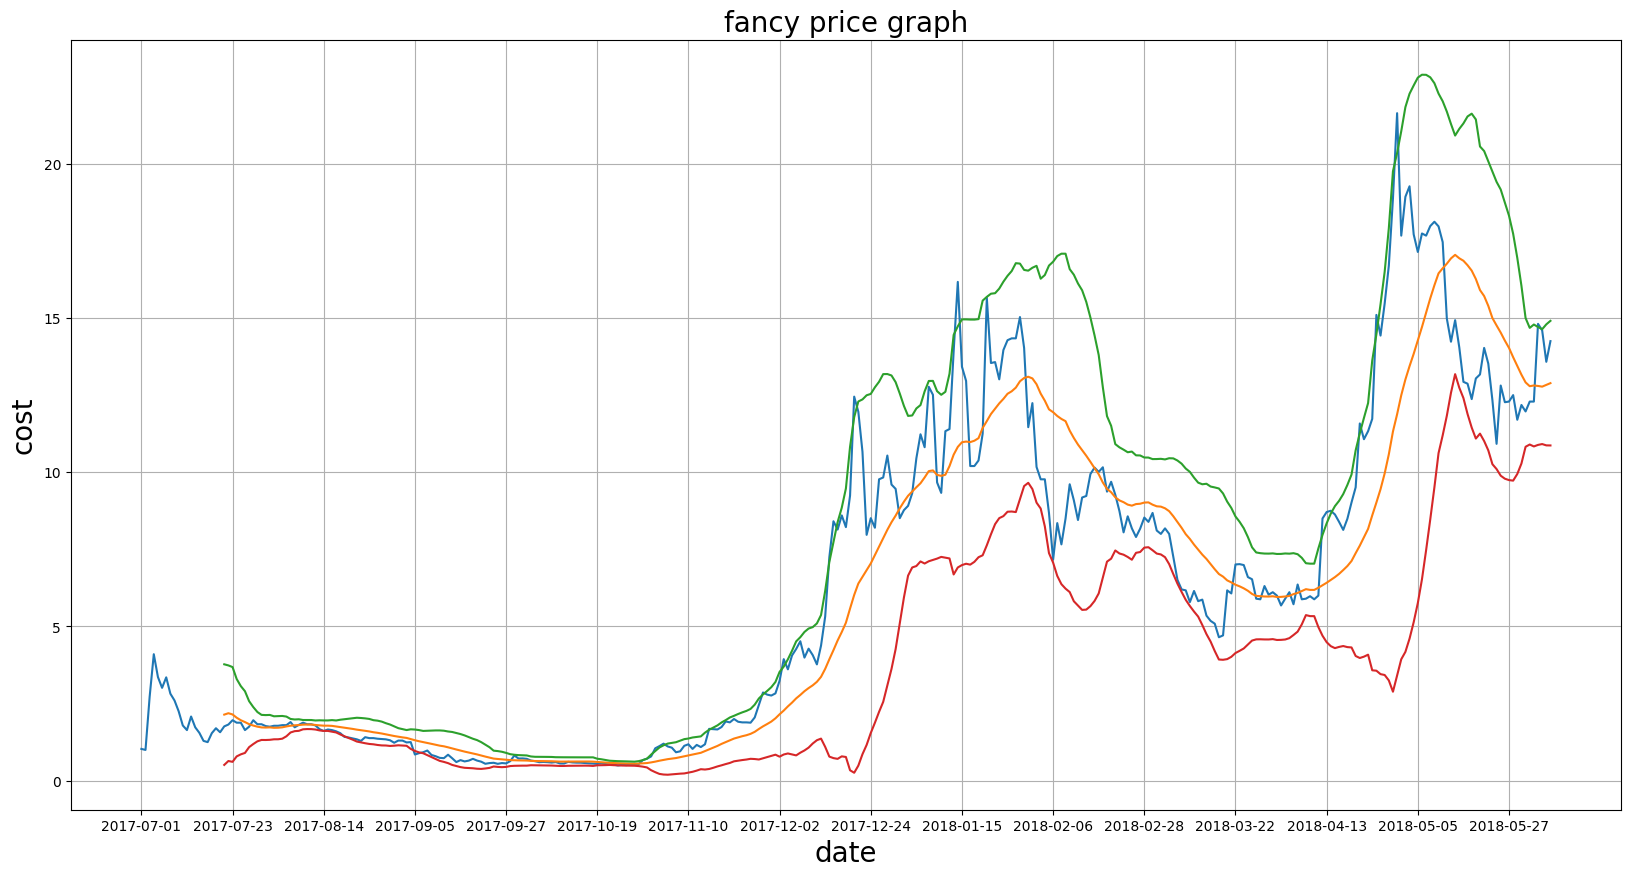

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

**Сделайте вывод о том, выполнялось ли правило Боллинджера:**

**Ваш ответ тут**

Да, выполняется, так как большая часть графика цены находится внутри границ Боллинджера


## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на [капитализацию](https://academy.binance.com/ru/articles/crypto-market-capitalization-explained). Давайте поймём почему.

**Нарисуйте еще два графика:**
1. общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC)
2. доли капитализаций этих монет от общей капитализации рынка.

При этом используйте данные начиная с 2017-07-01.

In [ ]:
def plot_coins_capitalizations(coins, symbols, start_date):
    # Paste your code here

In [ ]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

Проанализируйте зависимость доли капитализации альткойнов (остальных монет, кроме биткойна) от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

**Ваш ответ тут**

## 7. Корреляции монет (1 балл)

Теперь нужно подробнее посмотреть на корреляции средних долей капитализаций монет. При этом будем смотреть на среднее сглаженное за последние `window` дней до дня `date` с коэффициентом сглаживания `alpha` для набора монет `symbols`.

Реализуйте функцию, которая будет возвращать квадратный `DataFrame` с числом строк и столбцов, равным числу рассматриваемых монет и со значениями корреляций:

In [ ]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    # Paste your code here

In [ ]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

Довольно интересно ещё взглянуть на 2017-12-27:

In [ ]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия, основанная на скользящих средних.

Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). **Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае.**

Посмотрим на пример:

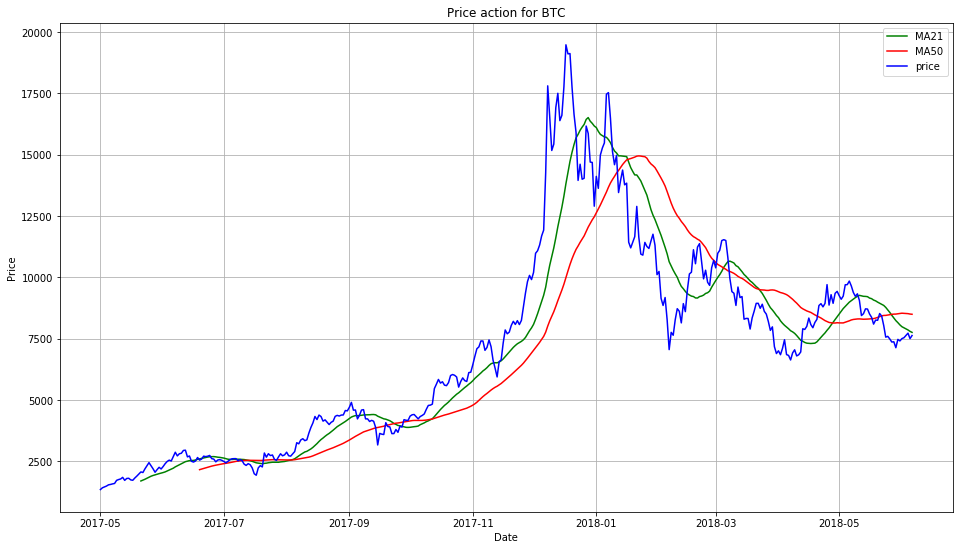

In [ ]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)

    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show()

plot_moving_averages(
    coins=coins,
    symbol='BTC',
    leading_window=21,
    lagging_window=50,
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия/


**Реализуйте функцию**, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании (купили и держим, смотрим как растет цена наших купленных валют).

Иными словами сравниваем 2 подхода:
- сразу в начальный момент времени купить крипты на все деньги - обычное инвестирование
- ждать подходящих моментов и покупать только в них равными порциями - стратегия

Считайте, что суммарное количество вложенных денег в обоих подходах одинаковое.

>**Примечания:**
>- Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод `shift(1)` у `Series`.
>- Отношение цен закрытия за сегодня и за вчера - это **multiplier** за сегодняшний день. При этом давайте строить графики накопления для multiplier-ов. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй - 0.5 и в третий - 2, то график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).
>- При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый `threshold` (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21,
    min=1,
    max=200,
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1,
    max=200,
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0,
    max=0.20,
    step=0.001,
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели:

**Ваш ответ тут**

## 9. Отказ от ответственности

Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.